<a href="https://colab.research.google.com/github/ChrisCT17/TareasTHC/blob/main/Actividad_12_de_noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt #importamos las bibliotecas
import numpy as np
import pandas as pd

In [24]:
link="https://github.com/ChrisCT17/TareasTHC/blob/main/ebola_2014_2016_clean.csv"#Link de github
code="?raw=true" #para que pandas lea el archivo csv y se pueda procesar
url=link+code #se unen el link y el codigo para leer el archivo
df=pd.read_csv(url,sep=",",index_col=1) #cargar archivo a la variable df

Con df.head() vemos las primeras columnas de la base de datos, le podemos agregar argumentos en el parentesis para obtener mas filas.

Con df.tail() vemos las ultimas columnas

Con df.describe() vemos las estadisticas de la base de datos
Con df.info() nos da informacion acerca del tipo de datos

In [6]:
df.describe()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
count,2484.000000,1648.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,1436.616345,781.662015,861.969807,574.646538,258.590942,172.393961,517.181884,344.787923,86.196981,57.464654
std,2574.200797,1258.113098,1544.520478,1029.680319,463.356143,308.904096,926.712287,617.808191,154.452048,102.968032
min,1.000000,0.000000,0.600000,0.400000,0.180000,0.120000,0.360000,0.240000,0.060000,0.040000
25%,1.000000,0.000000,0.600000,0.400000,0.180000,0.120000,0.360000,0.240000,0.060000,0.040000
50%,7.000000,2.000000,4.200000,2.800000,1.260000,0.840000,2.520000,1.680000,0.420000,0.280000
75%,3118.000000,1760.750000,1870.800000,1247.200000,561.240000,374.160000,1122.480000,748.320000,187.080000,124.720000
max,8704.000000,3858.000000,5222.400000,3481.600000,1566.720000,1044.480000,3133.440000,2088.960000,522.240000,348.160000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 29/08/2014 to 23/03/2016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   int64  
 2   No. of confirmed deaths  1648 non-null   float64
 3   Male Cases               2484 non-null   float64
 4   Female Cases             2484 non-null   float64
 5   Boys                     2484 non-null   float64
 6   Girls                    2484 non-null   float64
 7   Adult Male               2484 non-null   float64
 8   Adult Female             2484 non-null   float64
 9   Old Male                 2484 non-null   float64
 10  Old Female               2484 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 232.9+ KB


In [10]:
df["Country"].isin(["Mexico"]).sum() #Buscamos si hay casos en mexico, es decir, bsucamos acerca de si hay informacion de mexico

0

In [27]:
df.isnull().sum() #Cuantos valores faltantes hay en la base de datos (por columna)

,0
Country,0
No. of confirmed cases,0
No. of confirmed deaths,836
Male Cases,0
Female Cases,0
Boys,0
Girls,0
Adult Male,0
Adult Female,0
Old Male,0


In [14]:
#Contamos cuantos casos hay por pais para tener una idea de cuantos datos faltantes hay
conteo=df.groupby("Country").size().reset_index(name="conteo")
conteo.sort_values("conteo",ascending=False)

,Country,conteo
2,Liberia,364
0,Guinea,259
6,Sierra Leone,259
4,Nigeria,255
5,Senegal,254
9,United States of America,245
3,Mali,243
7,Spain,243
8,United Kingdom,221
1,Italy,141


In [15]:
#Contamos los datos faltantes por pais
missing=df["No. of confirmed deaths"].isnull().groupby(df["Country"]).sum()
missing.sort_values(ascending=False)

,No. of confirmed deaths
Country,
Liberia,239
Mali,234
United Kingdom,219
Italy,140
Guinea,2
Sierra Leone,2
Nigeria,0
Senegal,0
Spain,0


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
link="https://github.com/ChrisCT17/TareasTHC/blob/main/ebola_2014_2016_clean.csv"#Link de github
code="?raw=true" #para que pandas lea el archivo csv y se pueda procesar
url=link+code #se unen el link y el codigo para leer el archivo
df=pd.read_csv(url,sep=",",index_col=1) #cargar archivo a la variable df

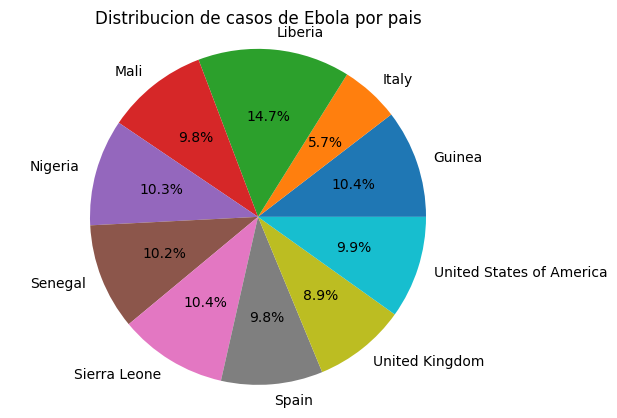

In [28]:
#Grafica de pastel
#autopct, ajusta los porcentajes de manera automatica
plt.pie(conteo["conteo"],labels=conteo["Country"],autopct="%0.1f%%")
plt.title("Distribucion de casos de Ebola por pais")
plt.axis("equal") #para un mejor despliegue de la grafica
plt.savefig("ebola_pie.png",dpi=300,format="png") #guardar imagen con alta calidad
plt.show() #mostrar la grafica de pastel

In [45]:
#Analizar los casos de ebola en Guinea
Guinea=df[df["Country"]=="Guinea"]
Guinea.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
08/09/2014,Guinea,664,400.0,398.4,265.6,119.52,79.68,239.04,159.36,39.84,26.56
12/09/2014,Guinea,678,403.0,406.8,271.2,122.04,81.36,244.08,162.72,40.68,27.12
16/09/2014,Guinea,743,429.0,445.8,297.2,133.74,89.16,267.48,178.32,44.58,29.72


In [46]:
Guinea.shape

(259, 11)

In [47]:
Guinea.describe()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
count,259.000000,257.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,2894.293436,1794.595331,1736.576062,1157.717375,520.972819,347.315212,1041.945637,694.630425,173.657606,115.771737
std,680.007101,435.855453,408.004261,272.002840,122.401278,81.600852,244.802556,163.201704,40.800426,27.200284
min,482.000000,287.000000,289.200000,192.800000,86.760000,57.840000,173.520000,115.680000,28.920000,19.280000
25%,2674.000000,1651.000000,1604.400000,1069.600000,481.320000,320.880000,962.640000,641.760000,160.440000,106.960000
50%,3216.000000,2009.000000,1929.600000,1286.400000,578.880000,385.920000,1157.760000,771.840000,192.960000,128.640000
75%,3336.000000,2076.000000,2001.600000,1334.400000,600.480000,400.320000,1200.960000,800.640000,200.160000,133.440000
max,3351.000000,2083.000000,2010.600000,1340.400000,603.180000,402.120000,1206.360000,804.240000,201.060000,134.040000


In [48]:
Guinea.isnull().sum()

,0
Country,0
No. of confirmed cases,0
No. of confirmed deaths,2
Male Cases,0
Female Cases,0
Boys,0
Girls,0
Adult Male,0
Adult Female,0
Old Male,0


In [49]:
#Llenar datos nulos con el promedio de la base de datos
mean_value=Guinea["No. of confirmed deaths"].mean() #Obtiene el promedio de la base de datos (pra las muertes confirmadas)
Guinea.fillna(mean_value,inplace=True) #reemplaza los valores donde estaban los datos nulos (fillna)
Guinea.isnull().sum() #comprueba que ya no hay datos nulos

<ipython-input-49-0e44578e0a36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Guinea.fillna(mean_value,inplace=True) #reemplaza los valores donde estaban los datos nulos (fillna)


,0
Country,0
No. of confirmed cases,0
No. of confirmed deaths,0
Male Cases,0
Female Cases,0
Boys,0
Girls,0
Adult Male,0
Adult Female,0
Old Male,0


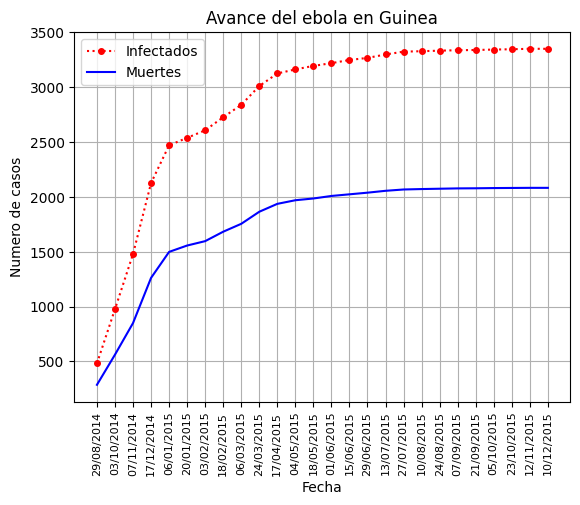

In [58]:
#Grafica de casos confirmados (infectados) contra decesos
#Asignamos variables a los datos de las columnas de infectados y de muertes
#para visualizar el avance del ebola en Guinea
#Se huzon un slice para mostrar los datos de 10 en 10 (grafica de barras)
Guinea_infectados=Guinea["No. of confirmed cases"][0:-1:10]
Guinea_muertes=Guinea["No. of confirmed deaths"][0:-1:10]
fechas=Guinea.index[0:-1:10]
plt.plot(fechas,Guinea_infectados,"o:r",label="Infectados",ms=4)
plt.plot(fechas,Guinea_muertes,"-b",ms=4,label="Muertes")
plt.title("Avance del ebola en Guinea")
plt.xlabel("Fecha")
plt.ylabel("Numero de casos")
plt.legend()
plt.savefig("ebola_guinea.png",dpi=300,format="png")
plt.grid()
plt.xticks(rotation=90,fontsize=8)
plt.show()


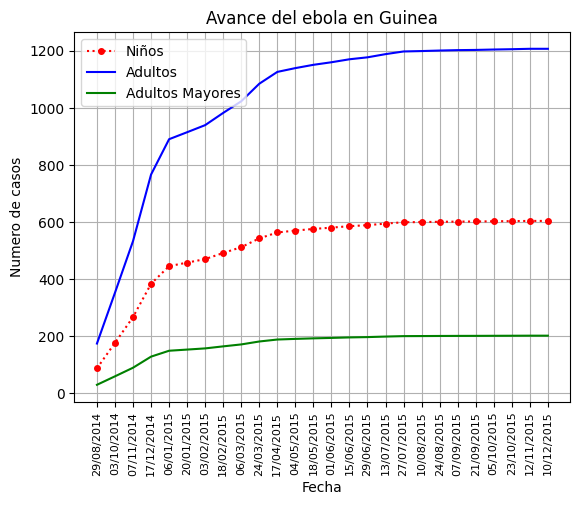

In [56]:
#Vmaos a analizar el avance del ebola en niños y adultos mayores (ambos generos)
Guinea_boys=Guinea["Boys"][0:-1:10]
Guinea_AM=Guinea["Adult Male"][0:-1:10]
Guinea_AM_m=Guinea["Old Male"][0:-1:10]
fechas=Guinea.index[0:-1:10]

plt.plot(fechas,Guinea_boys,"o:r",label="Niños",ms=4)
plt.plot(fechas,Guinea_AM,"-b",ms=4,label="Adultos")
plt.plot(fechas,Guinea_AM_m,"-g",ms=4,label="Adultos Mayores")
plt.title("Avance del ebola en Guinea")
plt.xlabel("Fecha")
plt.ylabel("Numero de casos")
plt.grid()
plt.xticks(rotation=90,fontsize=8)
plt.legend()

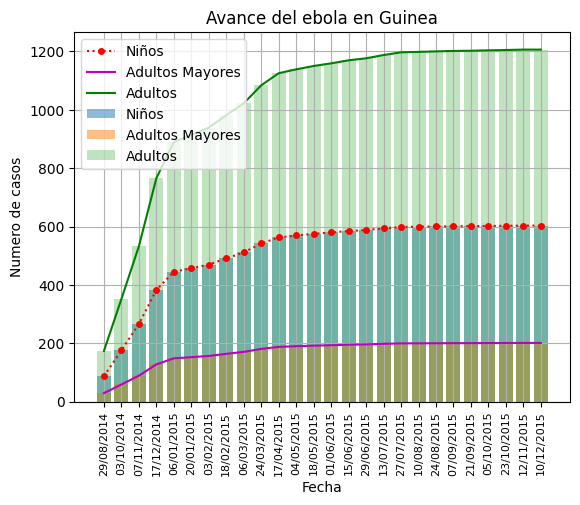

In [61]:
Guinea_boys=Guinea["Boys"][0:-1:10]
Guinea_AM=Guinea["Adult Male"][0:-1:10]
Guinea_AM_m=Guinea["Old Male"][0:-1:10]
fechas=Guinea.index[0:-1:10]

plt.plot(fechas,Guinea_boys,"o:r",label="Niños",ms=4)
plt.bar(fechas,Guinea_boys,alpha=0.5,label="Niños") #Grafica de barras
#alpha es el parametro que da transparenccia a las barras (va de 0 a 1, transparante a opcao, respectivamente)
plt.plot(fechas,Guinea_AM_m,"-m",ms=4,label="Adultos Mayores")
plt.bar(fechas,Guinea_AM_m,alpha=0.5,label="Adultos Mayores")
plt.plot(fechas,Guinea_AM,"-g",ms=4,label="Adultos")
plt.bar(fechas,Guinea_AM,alpha=0.3,label="Adultos")
plt.title("Avance del ebola en Guinea")
plt.xlabel("Fecha")
plt.ylabel("Numero de casos")
plt.grid()
plt.xticks(rotation=90,fontsize=8)
plt.legend()

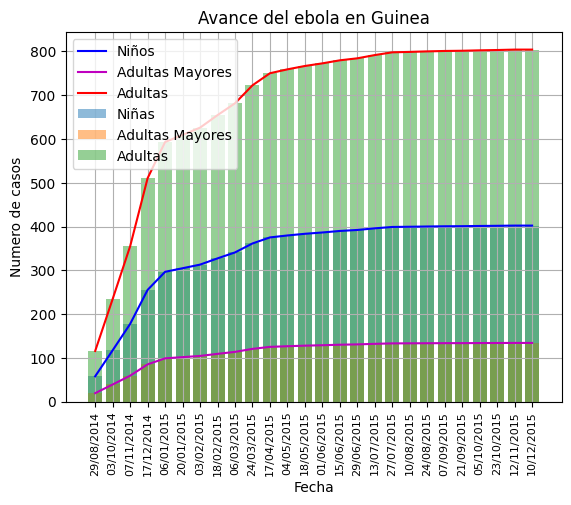

In [66]:
Guinea_girls=Guinea["Girls"][0:-1:10]
Guinea_Am=Guinea["Adult Female"][0:-1:10]
Guinea_Am_old=Guinea["Old Female"][0:-1:10]
fechas=Guinea.index[0:-1:10]

plt.plot(fechas,Guinea_girls,"-b",label="Niños",ms=4)
plt.bar(fechas,Guinea_girls,alpha=0.5,label="Niñas") #Grafica de barras
#alpha es el parametro que da transparenccia a las barras (va de 0 a 1, transparante a opcao, respectivamente)
plt.plot(fechas,Guinea_Am_old,"-m",ms=4,label="Adultas Mayores")
plt.bar(fechas,Guinea_Am_old,alpha=0.5,label="Adultas Mayores")
plt.plot(fechas,Guinea_Am,"-r",ms=4,label="Adultas")
plt.bar(fechas,Guinea_Am,alpha=0.5,label="Adultas")
plt.title("Avance del ebola en Guinea")
plt.xlabel("Fecha")
plt.ylabel("Numero de casos")
plt.grid()
plt.xticks(rotation=90,fontsize=8)
plt.legend()